<a href="https://colab.research.google.com/github/linson13/MY-PROJECTS/blob/Machine-Learning-And-Artificial-Intelligence-Algorithms/Neural_Network_on_Boston_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - MSE: 567.2316 - loss: 567.2315
Epoch 2/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 189.4023 - loss: 189.4023
Epoch 3/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 47.5788 - loss: 47.5788
Epoch 4/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 36.4155 - loss: 36.4155
Epoch 5/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 30.5814 - loss: 30.5814
Epoch 6/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 24.8481 - loss: 24.8481
Epoch 7/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 23.2585 - loss: 23.2585
Epoch 8/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 33.0965 - loss: 33.0965
Epoch 9/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 20.5713 - loss: 20.5713
Epoch 10/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 20.7790 - loss: 20.7790
Epoch 11/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 20.6603 - loss: 20.6603
Epoch 12/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 16.2892 - loss: 16.2892
Epoch 13/150
41/41 ━━

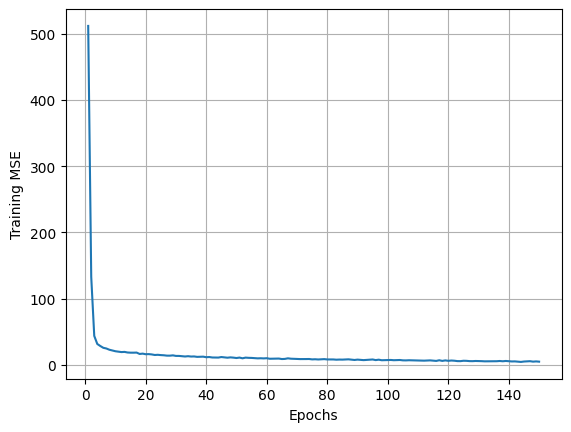

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


BosData = pd.read_csv('/content/drive/MyDrive/IITK fiiles/BostonHousing.csv')
X = BosData.iloc[:,0:11]
y = BosData.iloc[:, 13] # MEDV: Median value of owner-occupied homes in $1000s


# Boston Housing Dataset is a derived from information collected by
# the US Census Service concerning housing in the area of Boston MA.


# The 11 regressors/ features are
# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town


# The response/ target variable is
# MEDV: Median value of owner-occupied homes in $1000s


ss = StandardScaler()
X = ss.fit_transform(X)


Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state=2)

model = Sequential()
model.add(Dense(128, input_dim=11, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["MSE"])




history = model.fit(Xtrain, ytrain, epochs=150, batch_size=10)
ypred = model.predict(Xtest)
ypred = ypred[:,0]




mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print('Test MSE =', mse)
print('Test R2 score =', r2)


import matplotlib.pyplot as plt
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training MSE')
plt.grid()
plt.show()


